In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<H1>Loading the dataset

In [2]:
df=pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

There are 13 columns of features and 614 rows of records in the dataset. 

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are three types of data is dataset:
<li><b>object</b>: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status
<li><b>int64</b>:  It represents the integer variables. ApplicantIncome is of this format.
<li><b>float64</b>: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History.

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

From above we can see that,there are null values present in dataset.

<b>Handling the missing values

In [7]:
#Filling missing values witg mode
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [8]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In Loan Amount Term Variable,value 360 is repeated the most so we will use mode to replace null values.

In [9]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [10]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now there are no null values are present in dataset.

<H1> Exploratory Data Analysis

<B>Target Variable

Our target variable i.e.'Loan_Status' is categorical.So we will look at its frequency,percentage distribution and bar plot.

In [12]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [13]:
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

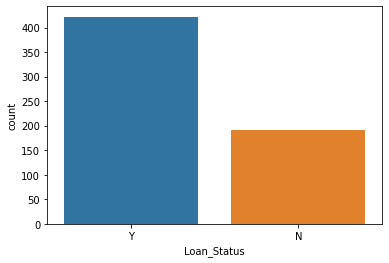

In [14]:
sns.countplot('Loan_Status',data=df)

The loan of around 422(69%) applicants out of 614 was approved.There is no imbalanced classes problem with the target varible.

<B>Independent Features (Categorical)

There are 5 features that are categorical or binary (Gender,Married,Self_Employed,Credit_History,Education).


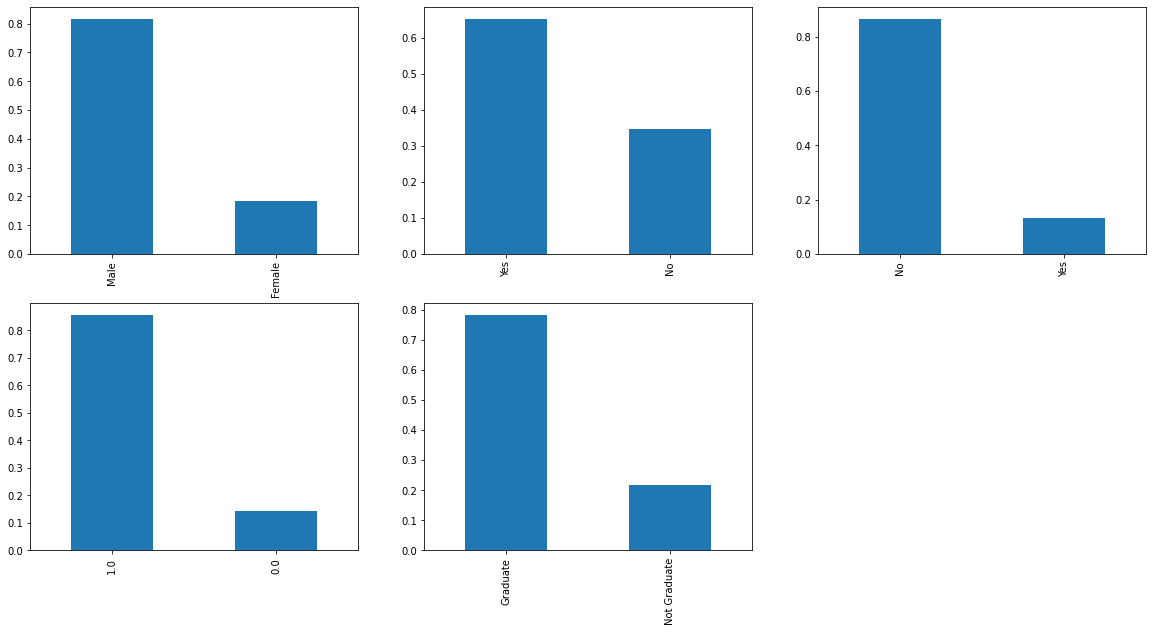

In [15]:
#visualizing catrgotical features

plt.subplot(231)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10))

plt.subplot(232)
df['Married'].value_counts(normalize=True).plot.bar()

plt.subplot(233)
df['Self_Employed'].value_counts(normalize=True).plot.bar()

plt.subplot(234)
df['Credit_History'].value_counts(normalize=True).plot.bar()

plt.subplot(235)
df['Education'].value_counts(normalize=True).plot.bar()

plt.show()

From above plots:
+ 80% of the applicants are male.
+ Around 65% of the applicants are married.
+ Only 15% of the applicants are self employed.
+ Around 85% of the applicants have credit history.
+ Around 80% of applicants are graduate.

<b>Independent Variable (Ordinal)

There are 2 ordinal variables.(Dependents and Property_Area)

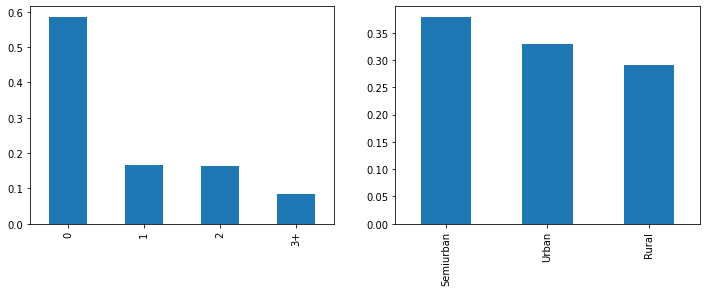

In [16]:
#visualizing ordinal features

plt.subplot(121)
df['Dependents'].value_counts(normalize=True).plot(kind='bar',figsize=(12,4))

plt.subplot(122)
df['Property_Area'].value_counts(normalize=True).plot(kind='bar')

plt.show()

Inferences made from above bar plots are:
+ Most of applicants have no dependents.
+ Most applicants are from suburban area.

<b>Independent Features (Numerical).

There are 4 numerical features (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)


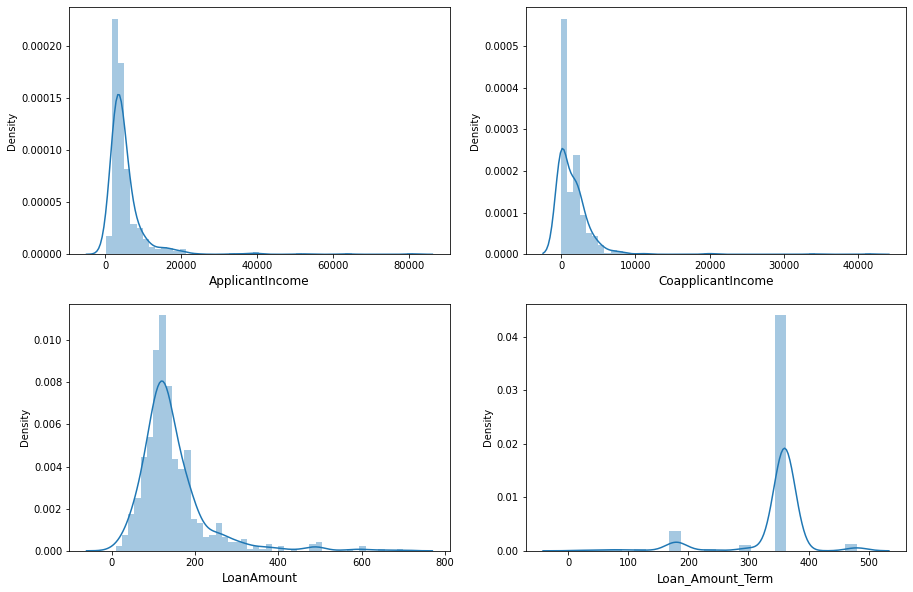

In [17]:
#distribution of numerical fetures
numerical=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
n=1
plt.figure(figsize=(15,10))
for col in numerical:
    if n<=4:
        ax=plt.subplot(2,2,n)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=12)
    n+=1
plt.show()

We can see that the columns ApplicantIncome, CoapplicantIncome and LoanAmount are skewed towards left.It means they are not normally distributed.We will make it normal in later sections.

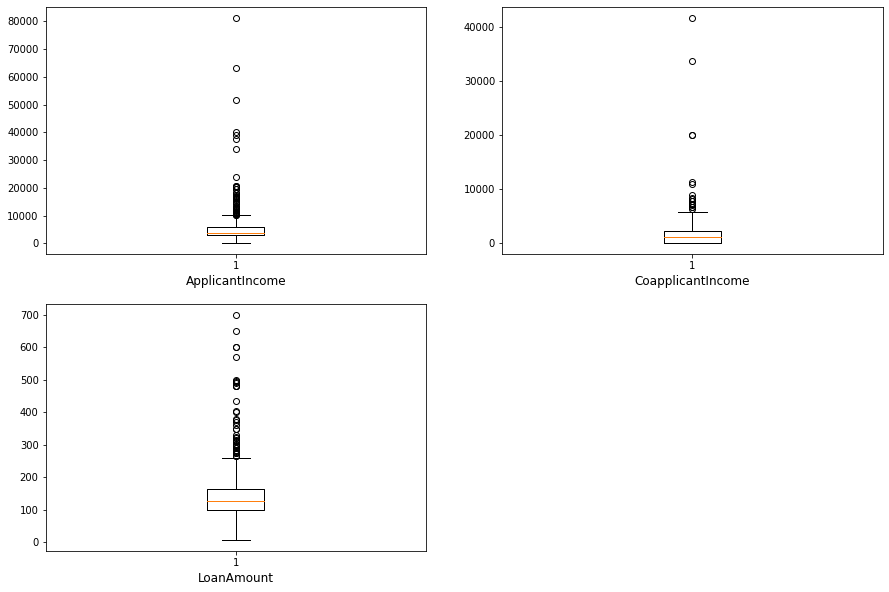

In [18]:
n=1
plt.figure(figsize=(15,10))
for col in numerical:
    if n<4:
        ax=plt.subplot(2,2,n)
        plt.boxplot(df[col])
        plt.xlabel(col,fontsize=12)
    n+=1
plt.show()

We can see that there are outleiers present in the dataset.We will remove outliers in later sections.

In [19]:
df['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:title={'center':'Loan Amount Term'}>

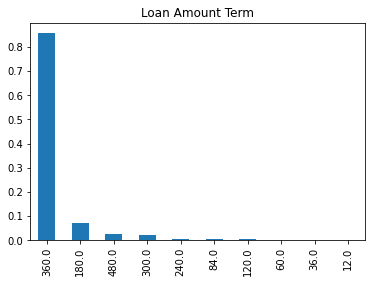

In [20]:
df['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title='Loan Amount Term')

Around 85% of the applicants choose 360 months term or 30 years period.

<b>Categorical Independent Features vs Target Variable

Loan_Status    N    Y
Gender               
Female        37   75
Male         155  347


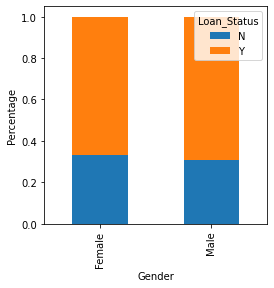

In [21]:
Gender=pd.crosstab(df['Gender'],df['Loan_Status'])
print(Gender)
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

Loan_Status    N    Y
Married              
No            79  134
Yes          113  288


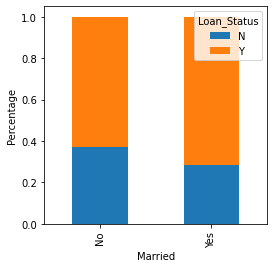

In [22]:
Married=pd.crosstab(df['Married'],df['Loan_Status'])
print(Married)
Married.div(Married.sum(1).astype(float), axis = 0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Married')
plt.ylabel('Percentage')
plt.show()

Loan_Status    N    Y
Dependents           
0            113  247
1             36   66
2             25   76
3+            18   33


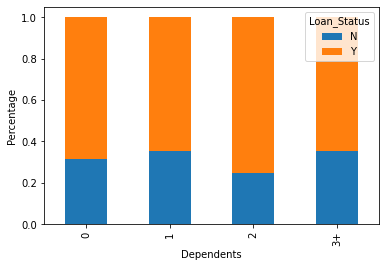

In [23]:
Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
print(Dependents)
Dependents.div(Dependents.sum(1).astype(float), axis = 0).plot(kind='bar',stacked=True,figsize=(6,4))
plt.xlabel('Dependents')
plt.ylabel('Percentage')
plt.show()

Loan_Status      N    Y
Self_Employed          
No             166  366
Yes             26   56


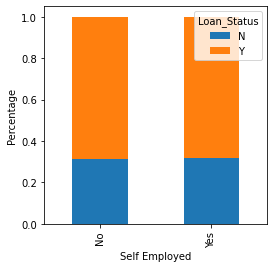

In [24]:
self_emp=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
print(self_emp)
self_emp.div(self_emp.sum(1).astype(float), axis = 0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Self Employed')
plt.ylabel('Percentage')
plt.show()

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


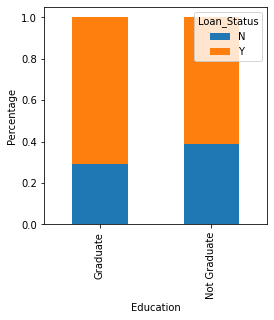

In [25]:
Education=pd.crosstab(df['Education'],df['Loan_Status'])
print(Education)
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Education')
plt.ylabel('Percentage')
plt.show()

Loan_Status       N    Y
Credit_History          
0.0              82    7
1.0             110  415


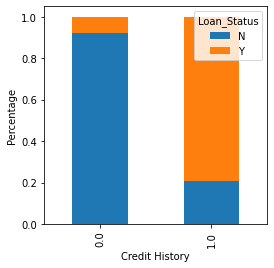

In [26]:
Credit=pd.crosstab(df['Credit_History'],df['Loan_Status'])
print(Credit)
Credit.div(Credit.sum(1).astype(float), axis = 0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Credit History')
plt.ylabel('Percentage')
plt.show()

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


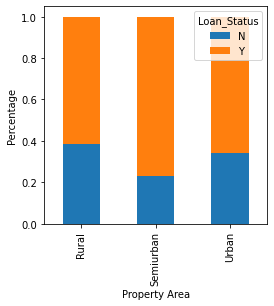

In [27]:
area=pd.crosstab(df['Property_Area'],df['Loan_Status'])
print(area)
area.div(area.sum(1).astype(float), axis = 0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Property Area')
plt.ylabel('Percentage')
plt.show()

From above charts it can be inferred that:
+ proportion of male and female applicants is more or less same for both approved and unapproved loans
+ proportion of married applicants is higher for the approved loans
+ distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status
+ there is nothing significant we can infer from Self_Employed vs Loan_Status plot.
+ proportion of loans getting approved for graduates is higher compared to non-graduates
+ it seems people with credit history as 1 are more likely to get their loans approved
+ proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

<b>Numerical Independent Features vs Target Variable

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64


<AxesSubplot:xlabel='Loan_Status'>

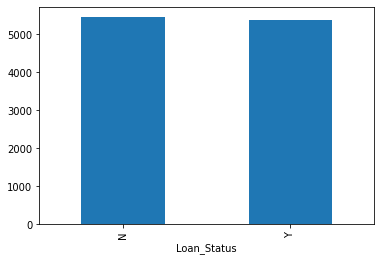

In [28]:
print(df.groupby('Loan_Status')['ApplicantIncome'].mean())
df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

We will change the 3+ in dependents variable to 3 to make it a numerical variable. We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [29]:
df['Loan_Status'].replace('N', 0, inplace=True)
df['Loan_Status'].replace('Y', 1, inplace=True)

In [30]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


<b> Correlation Plot

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134,-0.059187
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.033214
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.022549
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.540556
Loan_Status,-0.004710,-0.059187,-0.033214,-0.022549,0.540556,1.000000


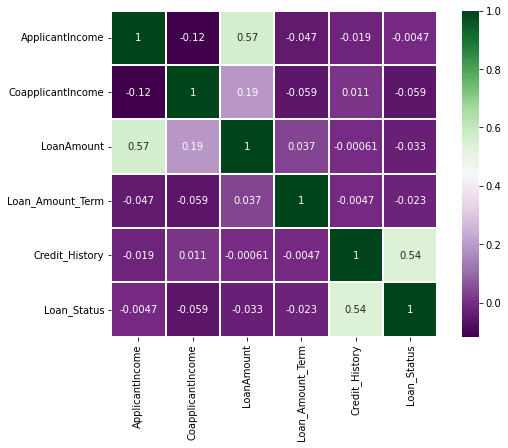

In [31]:
corr=df.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(corr,vmax=1,square=True,cmap='PRGn',linewidths=.1,annot=True)
corr

We see that most correlated variables are:
+ (ApplicantIncome - LoanAmount) with correlation coefficient of 0.57
+ (Credit_History - Loan_Status) with correlation coefficient of 0.56
+ LoanAmount is also correlated with CoapplicantIncome with correlation coefficient of 0.19.


# Data Preprocessing

<b>Encoding categorical variables

In [32]:
from sklearn.preprocessing import LabelEncoder

features=['Gender','Married','Self_Employed','Education','Credit_History','Dependents','Property_Area']
le=LabelEncoder()
df[features]=df[features].apply(le.fit_transform)

In [33]:
#dropping Loan Id
df.drop('Loan_ID',inplace=True,axis=1)

<b>Outliers treatment

In [34]:
from scipy.stats import zscore
z=np.abs(zscore(df))

np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
        7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
       dtype=int64))

In [35]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(577, 12)

In [36]:
#data loss
dataloss=((614-577)/614)*100
dataloss

6.026058631921824

After removing outliers data loss is 6% that is okay so we will proceed with reduced data.

Removing skewness from Loan Amount using log transformation

<AxesSubplot:>

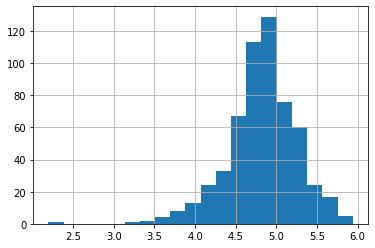

In [37]:
df_new['LoanAmount_log'] = np.log(df_new['LoanAmount'])
df_new['LoanAmount_log'].hist(bins=20)

# Feature Engineering

Adding new features to data set to increase the possibility of approval of loan.
We are going to add fetures like total income,EMI and Balance income.

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

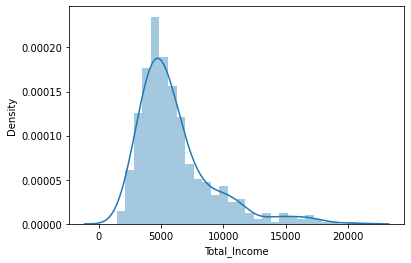

In [38]:
#total income feature
df_new['Total_Income']=df_new['ApplicantIncome']+df_new['CoapplicantIncome']
sns.distplot(df_new['Total_Income'])

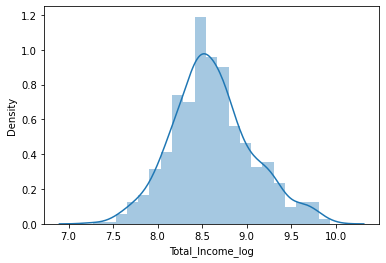

In [39]:
df_new['Total_Income_log'] = np.log(df_new['Total_Income'])
sns.distplot(df_new['Total_Income_log']);

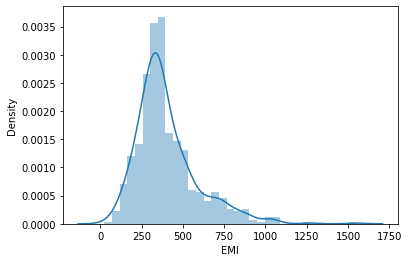

In [40]:
#EMI feature
df_new['EMI']=(df_new['LoanAmount']/df_new['Loan_Amount_Term'])*1000
sns.distplot(df_new['EMI']);

In [41]:
#balance income
df_new['Balance_Income']=df_new['Total_Income']-df_new['EMI']

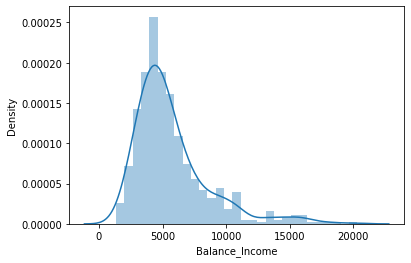

In [42]:
sns.distplot(df_new['Balance_Income']);

In [43]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(df_new)

array([[ 0.47713685, -1.36251079, -0.72331271, ...,  0.14503924,
        -0.24146086, -0.06513656],
       [ 0.47713685,  0.73393914,  0.2823534 , ...,  0.23569021,
        -0.24146086,  0.01677308],
       [ 0.47713685,  0.73393914, -0.72331271, ..., -1.34784558,
        -1.1577527 , -0.97114436],
       ...,
       [ 0.47713685,  0.73393914,  0.2823534 , ...,  0.93083602,
         1.60590174,  0.65098982],
       [ 0.47713685,  0.73393914,  1.28801951, ...,  0.72559047,
         0.63049429,  0.46629826],
       [-2.09583477, -1.36251079, -0.72331271, ..., -0.40035917,
        -0.16756635, -0.49833999]])

# Model Building

In [44]:
x=df_new.drop('Loan_Status',axis=1)
y=df_new['Loan_Status']

In [45]:
print(x.shape,y.shape)

(577, 16) (577,)


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

<B>Finding best random state


In [47]:
lr=LogisticRegression()
maxAccu=0
maxRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best acccuracy is',maxAccu,'with random state',maxRS)

Best acccuracy is 0.8908045977011494 with random state 39


In [48]:
#Splitting data in train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=39)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(403, 16)
(174, 16)
(403,)
(174,)


<h3>Logistic Regression

Training accuracy: 0.7890818858560794
Accuracy score: 0.8908045977011494
              precision    recall  f1-score   support

           0       1.00      0.62      0.77        50
           1       0.87      1.00      0.93       124

    accuracy                           0.89       174
   macro avg       0.93      0.81      0.85       174
weighted avg       0.91      0.89      0.88       174



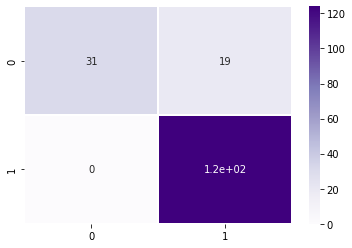

In [49]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print('Training accuracy:',lr.score(x_train,y_train))
print('Accuracy score:',accuracy_score(y_test,pred_lr))

# classification report
print(classification_report(y_test,pred_lr))

cm=confusion_matrix(y_test,pred_lr)
sns.heatmap(cm,annot=True,cmap='Purples',linewidths=0.1);

<h3>Decision Tree

Training accuracy: 1.0
Accuracy score: 0.7528735632183908
              precision    recall  f1-score   support

           0       0.56      0.66      0.61        50
           1       0.85      0.79      0.82       124

    accuracy                           0.75       174
   macro avg       0.71      0.73      0.71       174
weighted avg       0.77      0.75      0.76       174



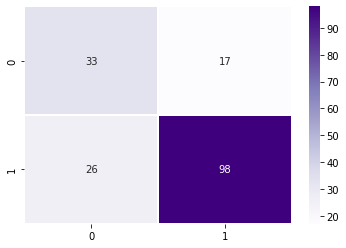

In [50]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)

print('Training accuracy:',dt.score(x_train,y_train))
print('Accuracy score:',accuracy_score(y_test,pred_dt))

# classification report
print(classification_report(y_test,pred_dt))

cm=confusion_matrix(y_test,pred_dt)
sns.heatmap(cm,annot=True,cmap='Purples',linewidths=0.1);

<h3>Random Forest 

Training accuracy: 1.0
Accuracy score: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.76      0.62      0.68        50
           1       0.86      0.92      0.89       124

    accuracy                           0.83       174
   macro avg       0.81      0.77      0.78       174
weighted avg       0.83      0.83      0.83       174



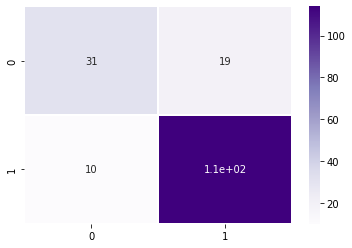

In [51]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)

print('Training accuracy:',rf.score(x_train,y_train))
print('Accuracy score:',accuracy_score(y_test,pred_rf))

# classification report
print(classification_report(y_test,pred_rf))

cm=confusion_matrix(y_test,pred_rf)
sns.heatmap(cm,annot=True,cmap='Purples',linewidths=0.1);

<h3>KNeighbors classifier

Training accuracy: 0.739454094292804
Accuracy score: 0.5977011494252874
              precision    recall  f1-score   support

           0       0.17      0.10      0.12        50
           1       0.69      0.80      0.74       124

    accuracy                           0.60       174
   macro avg       0.43      0.45      0.43       174
weighted avg       0.54      0.60      0.56       174



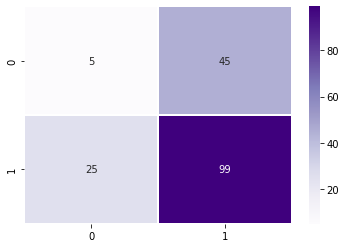

In [52]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)

print('Training accuracy:',knn.score(x_train,y_train))
print('Accuracy score:',accuracy_score(y_test,pred_knn))

# classification report
print(classification_report(y_test,pred_knn))

cm=confusion_matrix(y_test,pred_knn)
sns.heatmap(cm,annot=True,cmap='Purples',linewidths=0.1);

<h3>Support Vector Machine

Training accuracy: 0.6799007444168734
Accuracy score: 0.7126436781609196
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.71      1.00      0.83       124

    accuracy                           0.71       174
   macro avg       0.36      0.50      0.42       174
weighted avg       0.51      0.71      0.59       174



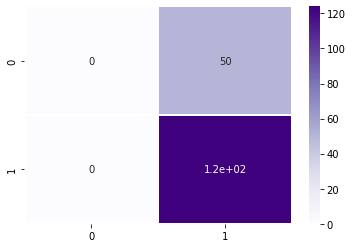

In [53]:
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)

print('Training accuracy:',svc.score(x_train,y_train))
print('Accuracy score:',accuracy_score(y_test,pred_svc))

# classification report
print(classification_report(y_test,pred_svc))

cm=confusion_matrix(y_test,pred_svc)
sns.heatmap(cm,annot=True,cmap='Purples',linewidths=0.1);

<h3>Cross Validation Score

In [54]:
#Cross validation score of Logistic regression
print(cross_val_score(lr,x,y,cv=5).mean())

#Cross Validation Score of Decision Tree
print(cross_val_score(dt,x,y,cv=5).mean())

#Cross Validation Score of Random Forest
print(cross_val_score(rf,x,y,cv=5).mean())

#Cross Validation Score of KNN Clasifiers
print(cross_val_score(knn,x,y,cv=5).mean())

#Cross Validation Score of SVC
print(cross_val_score(svc,x,y,cv=5).mean())

0.793808095952024
0.7503898050974513
0.805952023988006
0.6134932533733133
0.6897751124437781


From accuracy score and cross validation Logistic Regression is best model.

<H3>Hyperparameter Tuning

In [55]:
from sklearn.model_selection import GridSearchCV
parameters= {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'max_iter': [20, 50, 100, 200, 500, 1000]}
gcv=GridSearchCV(LogisticRegression(),parameters,scoring='accuracy',cv=5)
gcv.fit(x_train,y_train)
gcv.best_params_

{'max_iter': 50, 'solver': 'newton-cg'}

In [56]:
final_model=LogisticRegression(max_iter=50,solver='newton-cg')
final_model.fit(x_train,y_train)
predict=final_model.predict(x_test)
acc=accuracy_score(y_test,predict)
print(acc*100)

87.93103448275862


<h3>ROC AUC curve for best model

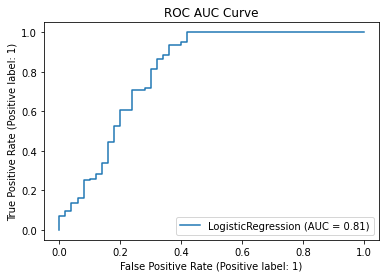

In [57]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(final_model,x_test,y_test)
plt.title('ROC AUC Curve')
plt.show()

<h3>Saving the model
 

In [58]:
import joblib
joblib.dump(final_model,'Loan prediction.pkl')

['Loan prediction.pkl']

In [59]:
joblib.load('Loan prediction.pkl')

LogisticRegression(max_iter=50, solver='newton-cg')